In [1]:
# Hypothesis: smaller kernel sizes will lead to higher accuracies of classification in fined-tuned image classification
# We think this is likely due to the ability of the CNN to detect smaller features between relatively similar images of the same species
# Independent Variables: kernel size
# Constant Variables: number of layers, types of layers, input shape, epoches, hyperparamaters(depth,padding)
# Dependent Variables: Accuracy
# Limitations: we are foregoing pure accuracy for experimental reasons - we could get higher accuracy if we tried but we're keeping
# things constant for consistancy between models
# Currently only using Input, Convolutional, Relu, Pool, and FC/Dense layers. Can add Dense and Dropout if we have time
# Reference to www.cs231n.github.io/convolutional-networks

In [2]:
# 3. Import libraries and modules
import os, cv2, argparse
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from numpy.random import RandomState
np.random.seed(123)  # for reproducibility
import sys
import random
from matplotlib import pyplot

/home/cfu288/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def shuffle_data(arr1, arr2):
    seed = random.randint(0, 1000)
    ran = RandomState(seed)
    ran.shuffle(arr1)
    ran = RandomState(seed)
    ran.shuffle(arr2)

In [3]:
# INPUT
TRAIN_DIR = './training/'
TEST_DIR = './validation/'
EPOCHS = 30

In [11]:
# Setup, Read in images, Preprocess images for training
TRAIN_IMG, TRAIN_CLS, TEST_IMG, TEST_CLS = ([] for i in range(4))
COLS = ['Label', 'Latin Name', 'Common Name', 'Train Images', 'Validation Images']
LABELS = pd.read_csv('./monkey_labels.txt', names=COLS, skiprows=1)
CLASSES = [x for x in range(0, len(LABELS))]

# read in all images
# resizing the images to 100x100 to make training faster
print("READING IN AND FORMATTING IMAGES")
for x in range(0, len(LABELS)):
    train_dir = TRAIN_DIR + LABELS.loc[x,'Label'].strip() + '/'
    test_dir = TEST_DIR + LABELS.loc[x,'Label'].strip() + '/'
    for file in os.listdir(train_dir):
        img = cv2.imread(train_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TRAIN_IMG.append(img)
            TRAIN_CLS.append(x)
    for file in os.listdir(test_dir):
        img = cv2.imread(test_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TEST_IMG.append(img)
            TEST_CLS.append(x)
print("COMPLETE")

READING IN AND FORMATTING IMAGES
COMPLETE


In [13]:
# convert to numpy arrays
TRAIN_IMG = np.array(TRAIN_IMG)
TEST_IMG = np.array(TEST_IMG)
TRAIN_CLS = np.array(TRAIN_CLS)
TEST_CLS = np.array(TEST_CLS)

# Preprocess images
# Reshape them to theanos format (channels, hight, width) # changed to tensorflow
# Convert to 0-255 to value in [0-1]
# TRAIN_IMG = TRAIN_IMG.reshape(TRAIN_IMG.shape[0], 3, 100, 100)
# TEST_IMG = TEST_IMG.reshape(TEST_IMG.shape[0], 3, 100, 100)
# TRAIN_IMG = TRAIN_IMG.astype('float32')
# TEST_IMG = TEST_IMG.astype('float32')
# TRAIN_IMG /= 255
# TEST_IMG /= 255

# # Reshape class labels
# TRAIN_CLS = np_utils.to_categorical(TRAIN_CLS, 10)
# TEST_CLS = np_utils.to_categorical(TEST_CLS, 10)

# # Shuffle the data
# shuffle_data(TRAIN_IMG, TRAIN_CLS)
# shuffle_data(TEST_IMG, TEST_CLS)

Found 1097 images belonging to 10 classes.
{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}
Found 272 images belonging to 10 classes.
{'n0': 0, 'n1': 1, 'n2': 2, 'n3': 3, 'n4': 4, 'n5': 5, 'n6': 6, 'n7': 7, 'n8': 8, 'n9': 9}


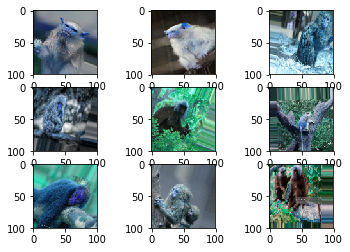

In [17]:
# Print some of the input for display
shift = 0.2
TRAIN_DATAGEN = ImageDataGenerator(rescale=1./255,
                                   rotation_range=25, 
                                   horizontal_flip=0.5, 
                                   zoom_range=0.1, 
                                   width_shift_range=shift, 
                                   height_shift_range=shift,
                                   fill_mode='nearest'
                                  )

TEST_DATAGEN = ImageDataGenerator(rescale=1./255)

TRAIN_GENERATOR = TRAIN_DATAGEN.flow_from_directory(
        TRAIN_DIR,  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical')
print(TRAIN_GENERATOR.class_indices)

TEST_GENERATOR = TEST_DATAGEN.flow_from_directory(
        TEST_DIR,  # this is the target directory
        target_size=(100, 100),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical')

print(TEST_GENERATOR.class_indices)

TRAIN_DATAGEN.fit(TRAIN_IMG)
for X_batch, y_batch in TRAIN_DATAGEN.flow(TRAIN_IMG, TRAIN_CLS, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(100, 100, 3), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [3]:
# Alternate Model - Simple

# Trying to use the simplest CNN possible - From here we can mess with the kernel and see if kernel size helps 
# with fine tuned classification
# Hypothesis: smaller kernel sizes will lead to higher accuracies of classification in fined-tuned image classification
# Independent Variables: kernel size
# Constant Variables: number of layers, types of layers, input shape, epoches
# Dependent Variables: Accuracy
# Limitations: we are foregoing pure accuracy for experimental reasons - we could get higher accuracy if we tried but we're keeping
# things constant for consistancy between models
# Currently only using Input, Convolutional, Relu, Pool, and FC/Dense layers. Can add Dropout(overfitting) if we have time
# Reference to www.cs231n.github.io/convolutional-networks
# Building a CNN generally requires 4 major steps: Convolution, Pooling, Flattening, Full Connection
test_kernel = (2,2)
test_kernel_two = (3,3)
num_filters = 50
input_shape=(100,100,3)

simple_model = Sequential()
# INPUT LAYER - Hold raw pixel values of an image, width 100, height 100, and with 3 color channels
# CONVOLUTIONAL LAYER - Compute the output of neurons connected to local regions in the input, each computing the dot 
#   product vetween their weights and a small region (decided by filter) they are connected to in the input volume
simple_model.add(Conv2D(num_filters, test_kernel, input_shape=input_shape))
# RELU LAYER - Apply an elemntwise activation function, max(0,x). Leaves the size of the volume unchanged, used to normalize output. Can be added a paramater to the previous layer but seperated for clarity
simple_model.add(Activation('relu'))
# DROPOUT LAYER - Randomly drop out specific neurons to prevent overfitting
simple_model.add(Dropout(.5))

simple_model.add(Conv2D(num_filters, test_kernel_two, input_shape=input_shape))
simple_model.add(Activation('relu'))
simple_model.add(Dropout(.5))

# POOL LAYER - Perform a downsampling operation along the psatial dimentions (width, height) resulting in a smaller volume
simple_model.add(MaxPooling2D(pool_size=(2,2)))
simple_model.add(Flatten()) # Converts and connects multi-dimentional convolutional layer into a 1D feature vector to be used for final classification
# FULLY CONNECTED LAYER - Compute class scores, resulting in a volume size of [1x1x10], where each of the 10 numbers represents a class
simple_model.add(Dense(10, activation='softmax'))
simple_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 99, 50)        650       
_________________________________________________________________
activation_1 (Activation)    (None, 99, 99, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 99, 99, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 97, 97, 50)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 50)        0         
__________

In [9]:
# Compile MINIST model
# print("COMPILING MINIST MODEL")
# # Adam - Modified Gradient Decent - learning rate changes as it nears
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Compile SIMPLE model
print("COMPILING SIMPLE MODEL")
# Adam - Modified Gradient Decent - learning rate changes as it nears
keras.optimizers.Adam(lr=0.0001)
simple_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("DONE COMPILING MODEL")

COMPILING SIMPLE MODEL
DONE COMPILING MODEL


In [11]:
# Train the model on the training data
# print("TRAINING FOR {} EPOCHS".format(EPOCHS)) 
# history = model.fit(TRAIN_IMG, TRAIN_CLS, batch_size=32, epochs=EPOCHS, verbose=1, validation_split=0.2, shuffle=True)

In [25]:
print("TRAINING SIMPLE MODEL FOR {} EPOCHS using {} kernel size".format(EPOCHS, test_kernel)) 
history = simple_model.fit_generator(
        TRAIN_GENERATOR,
        steps_per_epoch= 34,#samples // batch_size,
        epochs=EPOCHS
        #,
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size
        )

TRAINING SIMPLE MODEL FOR 15 EPOCHS using (2, 2) kernel size
Epoch 1/15
34/34 [==============================] - 70s 2s/step - loss: 0.8903 - acc: 0.6997
Epoch 2/15
34/34 [==============================] - 66s 2s/step - loss: 0.8446 - acc: 0.7117
Epoch 5/15
34/34 [==============================] - 74s 2s/step - loss: 0.8142 - acc: 0.6956
Epoch 6/15
34/34 [==============================] - 68s 2s/step - loss: 0.8455 - acc: 0.7049
Epoch 7/15
34/34 [==============================] - 68s 2s/step - loss: 0.8303 - acc: 0.7243
Epoch 8/15
34/34 [==============================] - 72s 2s/step - loss: 0.8620 - acc: 0.7129
Epoch 9/15
34/34 [==============================] - 67s 2s/step - loss: 0.8160 - acc: 0.7223
Epoch 10/15
34/34 [==============================] - 68s 2s/step - loss: 0.8440 - acc: 0.7085
Epoch 11/15
34/34 [==============================] - 71s 2s/step - loss: 0.8334 - acc: 0.7076
Epoch 12/15
34/34 [==============================] - 67s 2s/step - loss: 0.7763 - acc: 0.7306
Epoch 

In [13]:
# Train SIMPLE model on the training data
# Note: Probably overfitting this model, hit 100% on training before 10 iterations
#print("TRAINING SIMPLE MODEL FOR {} EPOCHS using {} kernel size".format(EPOCHS, test_kernel)) 
#history = simple_model.fit(TRAIN_IMG, TRAIN_CLS, batch_size=32, epochs=EPOCHS, verbose=1, validation_split=0.1, shuffle=True)

In [14]:
# Save the model
# print("SAVE MODEL")
# model.save('test_model.h5')
# print(history.history.keys())

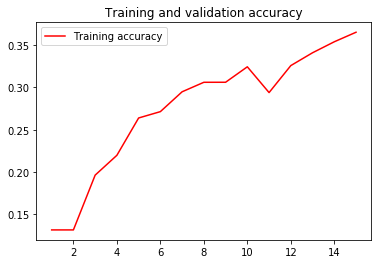

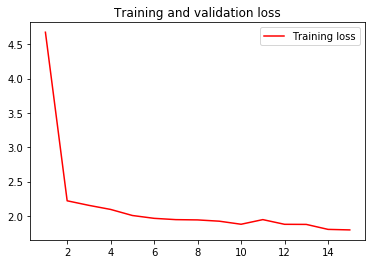

<Figure size 432x288 with 0 Axes>

In [15]:
# TODO - Print a plot of loss and accuracy over epochs and learning rates
acc = history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
#plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
#plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()
plt.savefig("OverfittingTestData.png")

# If your training loss is much lower than validation loss then this means the network might be overfitting. Solutions to this are to decrease your network size, or to increase dropout. For example you could try dropout of 0.5 and so on.
# If your training/validation loss are about equal then your model is underfitting. Increase the size of your model (either number of layers or the raw number of neurons per layer)

In [16]:
#model = load_model('test_model.h5')

# Evaluate the model on the validation data
# loss, acc = model.evaluate(TEST_IMG, TEST_CLS, verbose=1)
# print("Loss: ", loss, " Accuracy: ", acc)

In [26]:
# Save and Evaluate the SIMPLE model on the validation data
#print("SAVE SIMPLE MODEL")
#simple_model.save('models/simple_model.h5')
# print(history.history.keys())
# loss, acc = simple_model.evaluate(TEST_IMG, TEST_CLS, verbose=1)
# print("Loss: ", loss, " Accuracy: ", acc)
print(history.history.keys())
loss, acc = simple_model.evaluate_generator(TEST_GENERATOR, 272/32, workers=4)
print("Loss: ", loss, " Accuracy: ", acc)



dict_keys(['loss', 'acc'])
Loss:  1.213068877949434  Accuracy:  0.6286764705882353


In [18]:
# # Append results to the end of a text file
with open("results_dual_cnn_with_gen.txt", 'a') as f:
    f.write('{{ "accuracy":{}, "epochs":{}, "kernel":"{}", "num_filters":{}, "input_shape":"{}" }} \n'.format(
        acc, EPOCHS, test_kernel, num_filters, input_shape))

In [19]:
# Predict images
# TODO - Print mispredicted images, the label it predicted, and the correct label
'''
for i in range(len(TEST_IMG)):
    img = TEST_IMG[i]
    cls = TEST_CLS[i]
    img = np.array([img])
    prediction = model.predict(img, verbose=1, steps=1)
    print
    print "Class: ", cls
    print "Prediction: ", prediction[0]
    max_index = np.argmax(prediction[0])
    print "Predicted Class index: ", max_index
    print "Prediction Correct: ", True if cls[max_index] == 1. else False
'''

'\nfor i in range(len(TEST_IMG)):\n    img = TEST_IMG[i]\n    cls = TEST_CLS[i]\n    img = np.array([img])\n    prediction = model.predict(img, verbose=1, steps=1)\n    print\n    print "Class: ", cls\n    print "Prediction: ", prediction[0]\n    max_index = np.argmax(prediction[0])\n    print "Predicted Class index: ", max_index\n    print "Prediction Correct: ", True if cls[max_index] == 1. else False\n'